In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
def plot_gallery(images):
    # Affiche les 12 premières images contenues dans images 
    # images est de taille Nb image*Ny*Nx
  plt.figure(figsize=(7.2, 7.2)) 
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35) 
  for i in range(12): 
    plt.subplot(3, 4, i + 1) 
    plt.imshow(images[i], cmap=plt.cm.gray) 
    plt.xticks(()) 
    plt.yticks(()) 
    plt.show() 

In [ ]:
[X, y, name]=np.load("TP1.npy",allow_pickle=True )

plot_gallery(X)  #affiche les 12 premieres images de la liste de 1288 images

print("Il y a ",len(X),"images")  #np.shape(X)[0]
print("Il y a ",np.shape(X)[0],"images de taille :",np.shape(X)[1],"x",np.shape(X)[2])  
#X[0] les grandes "sous matrices" --> 1 "sous matrice" = 1 image ???
#X[1] et x[2] les petites "sous matrices" --> dimensions de l'image ???

print("Il y a ",np.size(name),"classes :",name)  #parmi les 1288 images il n'y a que 7 personnes differentes (plusieurs images des mêmes personnes)

y2=y[0:11]
print(y2)
print([name[i] for i in y2]) #donne l'identité des 12 personnes affichées

Text(0, 0.5, "nb d'images")

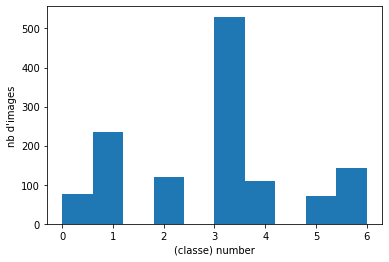

In [8]:
plt.hist(y)
plt.xlabel("(classe) number")
plt.ylabel("nb d'images")

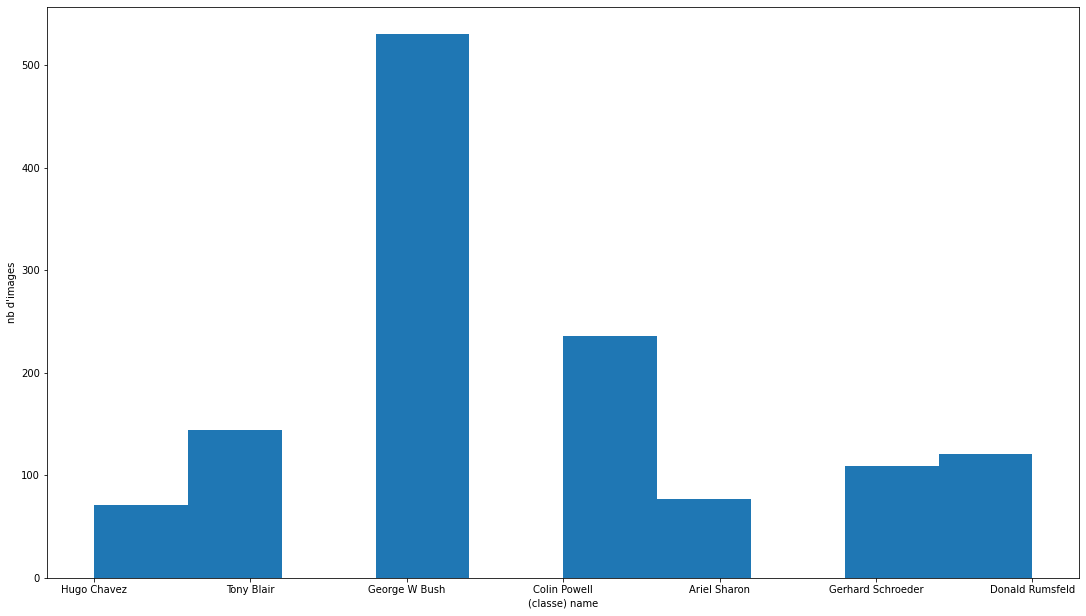

In [9]:
fig=plt.figure(1)
plt.hist([name[i] for i in y])
plt.xlabel("(classe) name")
plt.ylabel("nb d'images")
fig.set_size_inches(18.5,10.5,forward=True)

Les classes ne sont pas équiprobables

In [10]:
k=np.zeros(7)
for i in y:
  k[i]+=1

for i in range(0,7):
  print("Il y a ",k[i],"exemples dans la classe",name[i])



Il y a  77.0 exemples dans la classe Ariel Sharon
Il y a  236.0 exemples dans la classe Colin Powell
Il y a  121.0 exemples dans la classe Donald Rumsfeld
Il y a  530.0 exemples dans la classe George W Bush
Il y a  109.0 exemples dans la classe Gerhard Schroeder
Il y a  71.0 exemples dans la classe Hugo Chavez
Il y a  144.0 exemples dans la classe Tony Blair


In [16]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25) #Partitionne la base en une base d’apprentissage et une base de test en mettant 25% des données en test
print("Il y a ",len(X_train),"images en train")
print("Il y a ",len(X_test),"images en test")

print("Les dimensions de X_train sont :",np.shape(X_train))
print("Les dimensions de X_test sont :",np.shape(X_test))
print("Les dimensions de y_train sont :",np.shape(y_train))
print("Les dimensions de y_test sont :",np.shape(y_test))


Il y a  966 images en train
Il y a  322 images en test
Les dimensions de X_train sont : (966, 62, 47)
Les dimensions de X_test sont : (322, 62, 47)
Les dimensions de y_train sont : (966,)
Les dimensions de y_test sont : (322,)


In [23]:
n=2914
#X_train2=[X_train[:,1,2]]
#print(np.shape(X_train2))
#X_train3=np.reshape(np.shape(X_train2),n)
#print("Les dimensions de X_train sont :",np.shape(X_train))
#X_train.reshape(966,n,1)

#X_train = np.reshape(X_train,(np.shape(X_train)[0],np.shape(X)[1] * np.shape(X)[2]))
#X_test = np.reshape(X_test,(np.shape(X_test)[0],np.shape(X)[1] * np.shape(X)[2]))

#X_train.reshape(np.shape(X_train)[0],np.shape(X_train)[1] * np.shape(X_train)[2])
#X_test.reshape(np.shape(X_test)[0],np.shape(X_test)[1] * np.shape(X_test)[2])

X_train = np.reshape(X_train,(np.shape(X_train)[0],np.shape(X_train)[1] * np.shape(X_train)[2]))
X_test = np.reshape(X_test,(np.shape(X_test)[0],np.shape(X_test)[1] * np.shape(X_test)[2]))

In [35]:
scaler = StandardScaler().fit(X_train) #fit est une methode de StandardScaler qui Compute the mean and std to be used for later scaling.
X_scaled = scaler.transform(X_train) #transform est une methode de StandardScaler qui Perform standardization by centering and scaling.

scaler_test = StandardScaler().fit(X_test)
X_scaled_test = scaler.transform(X_test)

# données moyenné centré 

# StandardScaler = Standardize features by removing the mean and scaling to unit variance.

#The standard score of a sample x is calculated as:  z = (x - u) / s
#where u is the mean of the training samples or zero if with_mean=False, and s is the standard 
#deviation of the training samples or one if with_std=False.
#Centering and scaling happen independently on each feature by computing the relevant 
#statistics on the samples in the training set. Mean and standard deviation are 
#then stored to be used on later data using transform.

#in practice we often ignore the shape of the distribution and just transform the data 
#to center it by removing the mean value of each feature, then scale it by dividing non-constant features 
#by their standard deviation.
#For instance, many elements used in the objective function of a learning algorithm assume that all features are 
#centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude 
#larger than others, it might dominate the objective function and make the estimator unable to learn from 
#other features correctly as expected.

#Intro: Je suppose que vous avez une matrice X où chaque ligne / ligne est un échantillon / observation et chaque 
#colonne est une variable / caractéristique (c'est l'entrée attendue pour 
#toute sklearnfonction ML d'ailleurs - X.shape devrait être [number_of_samples, number_of_features]).
#Cœur de la méthode : L'idée principale est de normaliser / standardiser ie μ = 0 et σ = 1 vos 
#fonctionnalités / variables / colonnes de X, individuellement , avant d' appliquer tout modèle d'apprentissage automatique.

#StandardScaler()va normaliser les caractéristiques dire que chaque colonne de X, INDIVIDUELLEMENT , de sorte 
#que chaque colonne / fonction / variables auront μ = 0et σ = 1.

In [37]:
neigh = KNeighborsClassifier( n_neighbors=1, metric='euclidean') #KNeighborsClassifier est une classe d'objets adapté au K voisin en ML ?
neigh.fit(X_train, y_train)  #méthode de la classe KNeighborsClassifier renvoyant les k voisins les plus proches ?

y_pred = neigh.predict(X_test)   #classification des exemples tests  
#predict est une methode de la classe KNeighborsClassifier mais elle existe dans d'autre trucs sur python
# utilisation de predict --->  model.predict(data)

print(confusion_matrix(y_pred=y_pred, y_true=y_test))  #matrice de confusion
print(confusion_matrix(y_pred=y_pred, y_true=y_test).trace()) #taux de reconnaissance de la matrice de confusion
#les valeurs sur la diagonales correspondent aux Trues de chaque features
#la somme des Trues (aka la Trace) correspondant au taux de reconnaissance.
#si on avait que 2 features (positif et negatif) alors les termes diagonaux seraient les Trues Positifs et les Trues Negatifs
#confusion matrix ---> Compute confusion matrix to evaluate the accuracy of a classification.

#taux de reconnaissance de la matrice de confusion renvoyé par la fonction accuracy_score
print(accuracy_score(y_test, y_pred, normalize=False)) 

[[ 7  3  1  4  0  0  1]
 [ 6 29  2 12  1  0  3]
 [ 1  8 15 12  0  0  2]
 [ 1 12  9 94  2  4  9]
 [ 0  3  2  1  8  1  8]
 [ 0  0  1  3  3  8  1]
 [ 1  3  2  9  5  0 25]]
186
186


On constate que les classes ne sont pas équilibrées car grosses différence entre les termes diagonaux

In [38]:
scores = []
k_liste = list(range(1,10))
for k in k_liste:
  neigh = KNeighborsClassifier( n_neighbors=k,metric='euclidean')
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred, normalize=False))

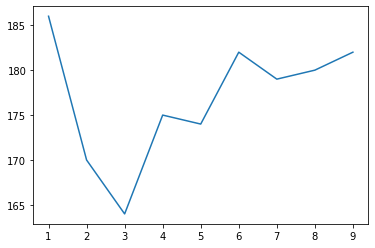

In [39]:
plt.plot(k_liste,scores)

In [40]:
scores = []
k_liste = list(range(1,10))
for k in k_liste:
  neigh = KNeighborsClassifier( n_neighbors=k,metric='manhattan')
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred, normalize=False))

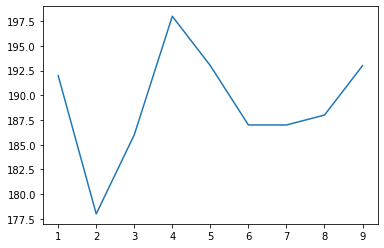

In [41]:
plt.plot(k_liste,scores)